# **Regression & Its Evaluation**

1.What is Simple Linear Regression?

-->Simple Linear Regression is a statistical method used to model the relationship between one independent variable (X) and one dependent variable (Y) using a straight line. The main purpose is to predict the value of Y based on a known value of X and to understand how X influences Y.

It assumes that the relationship between X and Y is linear, meaning it can be represented using the equation:

Y = a+bX

Where:

Y = predicted value

X = independent variable

a = intercept (value of Y when X = 0)

b = slope (rate of change in Y for a unit change in X)

To draw this line, the technique uses the Least Squares Method, which chooses the line that has the minimum total error between the actual data points and the predicted values.

---

2.What are the key assumptions of Simple Linear Regression?

--> Key Assumptions of Simple Linear Regression (SLR)

* Linearity
The relationship between the independent variable (X) and dependent variable (Y) must be linear. The data should form a roughly straight-line pattern.

* Independence of Errors
The residuals (errors) should be independent of each other. This means the error for one observation should not depend on another.

* Homoscedasticity (Constant Variance)
The variance of the errors should be constant across all values of X. Residuals should be spread evenly without forming a funnel or pattern.

* Normality of Errors
The residuals should follow a normal distribution, especially important for hypothesis testing and confidence intervals.

* No or Minimal Multicollinearity
In simple linear regression, there's only one predictor, so this means the predictor should not be highly correlated with omitted or irrelevant variables.
(In SLR this is less of an issue, but still noted as an assumption of regression.)

---

3.What is heteroscedasticity, and why is it important to address in regression
models?

-->Heteroscedasticity refers to a condition in regression analysis where the variance of the error terms (residuals) is not constant across all levels of the independent variable.
In simple words, the spread of errors increases or decreases as X changes.

Example: When plotting residuals, if they form a funnel shape (narrow to wide or wide to narrow), it indicates heteroscedasticity.

Its important to address in regression models are :

* Biased Standard Errors :
When heteroscedasticity is present, standard errors become unreliable, leading to wrong t-tests and p-values.

* Incorrect Hypothesis Testing :
Because standard errors are distorted, statistical tests may become invalid, causing you to wrongly accept or reject hypotheses.

* Poor Model Efficiency :
The Ordinary Least Squares (OLS) estimators remain unbiased, but they are no longer the best (not BLUE)—they lose efficiency.

* Unreliable Predictions :
The model may give inaccurate confidence intervals and predictions because error variance is not stable.

* Indicates Model Problems :
Heteroscedasticity often signals missing variables, incorrect functional form, or outliers—so it helps diagnose issues in the model.

---


4.What is Multiple Linear Regression?

--> Multiple Linear Regression is a statistical technique used to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, …, Xₙ).
It extends simple linear regression by allowing multiple factors to influence the output.

The general equation is :
  
  Y=a+b1​X1​+b2​X2​+⋯+bn​Xn​
	​


Where:

Y = dependent (predicted) variable

X₁, X₂, …, Xₙ = independent variables

a = intercept

b₁, b₂, …, bₙ = regression coefficients (effect of each X on Y)

*Purpose* :

To predict the value of Y based on several predictors.

To understand how each independent variable impacts the dependent variable.

To analyse complex real-world relationships where many factors affect the outcome.

*Examples* :

Predicting house price using size, location, number of bedrooms, and age.

Predicting student marks using study hours, attendance, and IQ.

---


5.What is polynomial regression, and how does it differ from linear
regression?

-->Polynomial Regression is a type of regression technique where the relationship between the independent variable (X) and dependent variable (Y) is modeled as an nth-degree polynomial.
It is useful when data shows a curved or non-linear pattern but can still be represented mathematically.

The general equation is:
  
  Y=a+b1​X+b2​X2+b3​X3+⋯+bn​Xn
Where:

Y → Dependent variable

X → Independent variable

a → Intercept

b₁, b₂, b₃, …, bₙ → Coefficients for each polynomial term

X, X², X³, …, Xⁿ → Higher-order powers of the input variable

Polynomial regression still uses linear regression methods to estimate the coefficients, but the model itself is non-linear in shape.


*Difference between Linear Regression and Polynomial Regression* :

| **Linear Regression**                                | **Polynomial Regression**                                   |
| ---------------------------------------------------- | ----------------------------------------------------------- |
| Models a straight-line relationship between X and Y. | Models a curved (non-linear) relationship.                  |
| Equation: Y = a + bX                                 | Equation: Y = a + b₁X + b₂X² + b₃X³ + … + bₙXⁿ              |
| Captures only simple linear trends.                  | Captures complex patterns like U-shaped or S-shaped curves. |
| Underfits when data is curved.                       | Fits curved data much better.                               |
| Only one slope (b).                                  | Multiple coefficients for X, X², X³, etc.                   |


---



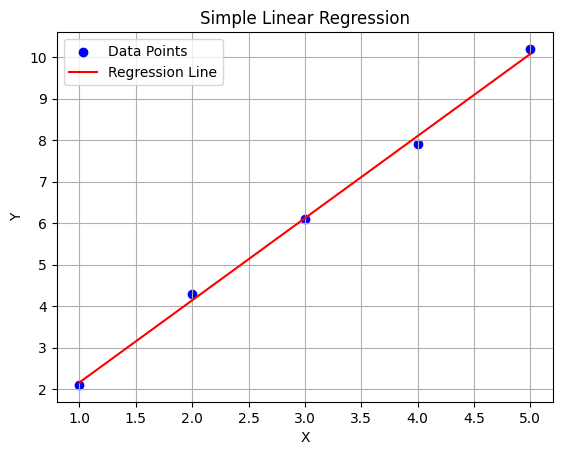

In [ ]:
# 6:  Implement a Python program to fit a Simple Linear Regression model to
# the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [2.1, 4.3, 6.1, 7.9, 10.2]})

X = df['X'].values.reshape(-1, 1)
Y = df['Y'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
# 7.Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.

import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#Data
data = {'Area': [1200, 1500, 1800, 2000],
        'Rooms': [2,3,3,4],
        'Price': [250000, 300000, 320000, 370000]}
df = pd.DataFrame(data)

# Define independent variables (X) and dependent variable (y)
X = df[['Area', 'Rooms']]
y = df['Price']

# Add a constant to the independent variables for statsmodels (for VIF calculation)
X_sm = sm.add_constant(X)

# Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Area: {model.coef_[0]:.2f}")
print(f"Coefficient for Rooms: {model.coef_[1]:.2f}\n")

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(len(X_sm.columns))]

print("VIF Results:")
print(vif_data)


Intercept: 103157.89
Coefficient for Area: 63.16
Coefficient for Rooms: 34736.84

VIF Results:
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


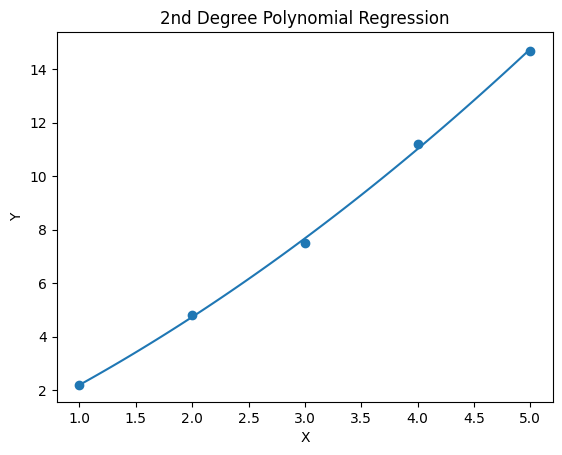

In [ ]:
# 8:  Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform X for polynomial regression (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.reshape(-1, 1))

# Train the model
model = LinearRegression()
model.fit(X_poly, Y)

# Generate smooth curve for plotting
x_curve = np.linspace(1, 5, 100)
x_curve_poly = poly.transform(x_curve.reshape(-1, 1))
y_curve = model.predict(x_curve_poly)

# Plot
plt.scatter(X, Y)                # original data points
plt.plot(x_curve, y_curve)       # polynomial curve
plt.title("2nd Degree Polynomial Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


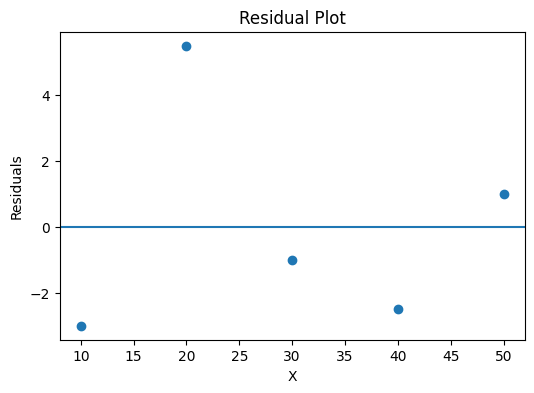

In [ ]:
# Question 9: Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]

import matplotlib.pyplot as plt
import numpy as np

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

# Predictions and residuals
y_pred = model.predict(X)
residuals = Y - y_pred

# Residual plot
plt.figure(figsize=(6,4))
plt.scatter(X, residuals)
plt.axhline(0)
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


10: Imagine you are a data scientist working for a real estate company. You
 need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression  model. Explain the steps you would take to address these issues and ensure a robust model.

--> As a data scientist predicting house prices using features like area, number of rooms, and location, it is important to ensure that the regression model is both reliable and statistically valid. If I detect heteroscedasticity and multicollinearity, I would take the following steps to correct them and improve model performance.

* Handling Heteroscedasticity

Heteroscedasticity means the variance of residuals is not constant. I first confirm it using residual plots and statistical tests.

To address it:

a) Apply Transformations

I would use a transformation such as log(Price) to stabilize variance, since real estate prices often show larger variability at higher values.

b) Use Weighted Least Squares (WLS)

If heteroscedasticity remains, I apply WLS, which gives less weight to data points with higher variance.

c) Check for Outliers

Luxury properties or extreme values can cause uneven residual spread.
I would inspect, cap, or transform such points if needed.

d) Consider Non-linear or Tree-based Models

If heteroscedasticity persists, models like Random Forests or Gradient Boosting naturally handle varying error variance.

 * Handling Multicollinearity

Multicollinearity arises when predictors are strongly correlated (e.g., Area and Rooms). It inflates VIF values and destabilizes coefficients.

To address it:

a) Identify Correlated Features

I inspect the correlation matrix and VIF scores to confirm the issue.

b) Remove or Combine Predictors

Highly correlated variables can be:

Removed, or

Combined (e.g., area per room)

c) Use Regularization

If I want to retain all predictors, I use:

Ridge regression to shrink coefficients

Lasso regression to select the most important features

d) Apply PCA for High-Dimensional Data

For many location-based variables, I may use Principal Component Analysis to reduce dimensionality while keeping most of the information.

* Refit and Validate the Model

After correcting both issues:

I refit the regression model.

I recheck residual plots to ensure assumptions are now satisfied.

I evaluate performance using cross-validation.

I compare MAE, RMSE, and R² before and after corrections to confirm improvements.

*Conclusion* :
By correcting heteroscedasticity through transformations and WLS, and addressing multicollinearity with feature engineering or regularization, I ensure the final house price prediction model is stable, accurate, and generalizes well to unseen data.

---